In [118]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.multivariate.manova import MANOVA

In [119]:
df = pd.read_csv ("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
print (df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [120]:
df.head(2)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [121]:
manova = MANOVA.from_formula("sepal_length+sepal_width+petal_length+petal_width~species", data=df)
print (manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2080.5278 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2080.5278 0.0000
 Hotelling-Lawley trace 57.7924 4.0000 144.0000 2080.5278 0.0000
    Roy's greatest root 57.7924 4.0000 144.0000 2080.5278 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0235 8.0000 288.0000  198.7110 0.0000
         Pillai's trace  1.1872 8.0000 290.00

In [122]:
fit1 = ols("sepal_length~species", data=df).fit()
fit2 = ols("sepal_width~species", data=df).fit()
fit3 = ols("petal_length~species", data=df).fit()
fit4 = ols("petal_width~species", data=df).fit()

In [123]:
anova1 = sm.stats.anova_lm(fit1)
anova1

,df,sum_sq,mean_sq,F,PR(>F)
species,2.0,63.212133,31.606067,119.264502,1.669669e-31
Residual,147.0,38.956200,0.265008,NaN,NaN


In [124]:
anova2 = sm.stats.anova_lm(fit2)
anova2

,df,sum_sq,mean_sq,F,PR(>F)
species,2.0,10.9776,5.488800,47.364461,1.327917e-16
Residual,147.0,17.0350,0.115884,NaN,NaN


In [125]:
anova3 = sm.stats.anova_lm(fit3)
anova3

,df,sum_sq,mean_sq,F,PR(>F)
species,2.0,436.643733,218.321867,1179.034328,3.051976e-91
Residual,147.0,27.220000,0.185170,NaN,NaN


In [126]:
anova4 = sm.stats.anova_lm(fit4)
anova4

,df,sum_sq,mean_sq,F,PR(>F)
species,2.0,80.604133,40.302067,959.324406,4.376957e-85
Residual,147.0,6.175600,0.042011,NaN,NaN


In [127]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(df["petal_length"], df["species"])
tukey._results_table

group1,group2,meandiff,p-adj,lower,upper,reject
setosa,versicolor,2.796,0.0,2.5922,2.9998,True
setosa,virginica,4.088,0.0,3.8842,4.2918,True
versicolor,virginica,1.292,0.0,1.0882,1.4958,True


In [128]:
setosa = df.iloc[0:50, 2]
virginica=df.iloc[50:100, 2]
versicolor = df.iloc[100:150, 2]

In [129]:
stats.ttest_ind(virginica, versicolor, equal_var=False, alternative = "less")

Ttest_indResult(statistic=-12.603779441384987, pvalue=2.4501437636990477e-22)

   X   Y
0  6  38
1  9  19
2  6  21
3  1  12
4  1  29
5  2  30
6  8  15
7  7   5
8  3  24
9  5  24


<AxesSubplot:xlabel='X', ylabel='Y'>

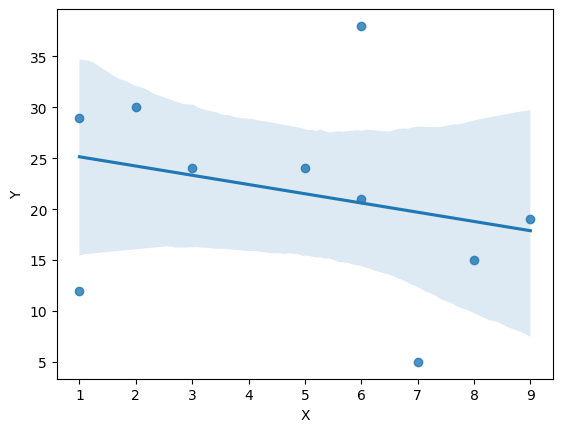

In [130]:
import seaborn as sns
import numpy as np
np.random.seed(1)
df2 = pd.DataFrame({"X": np.random.randint(1, 10, size=10), "Y": np.random.randint(1, 40, size=10)})
print (df2)
sns.regplot(df2, x=df2["X"], y=df2["Y"])